# Introduction


With Amazon receiving millions of transactions each day, it becomes a challenge understanding how much of that feedback is positive or negitive. Fortunatly machine learning techniques can aid in effective classification of review and in this project I develop an algorithm to classify positive video game reviews. 


To accomplish this task, I use a dataset  of Amazon product reviews from UCSD. This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.The video game subset of product reviews contains 231,780 cases.  In this project, I test several different supervised learning models for the most accurate classification of positive reviews, including:

- Native Bayes Classifier
- Knn classifier
- Random Forest
- Decision tree
- Logistic regression
- Svm classifier
- Gradient boosted classifier

I use gridsearch cv to find the ideal parameters for each of the classifiers I use. I also use a number of different metrics to evaluate the performance of each of the models. The AUC and ROC plots reveal the positive to false positive rate and helps visually compare the effectiveness of the classifier. I use holdout grouping, cross-validation, and run classification reports on each of the models.

In [1]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
import nltk
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /Users/Gabriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/Gabriel/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk



## Exploration 

#### In this section, we will create our target variable and visualize the distribution of classes 

In [4]:
reviews = pd.read_json('reviews_Video_Games_5.json', lines=True)
reviews.head()


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


In [5]:
# create target varible for good review, 1, 0 
reviews['overall'].value_counts()

# to better balance the classes, I will define a good review as a >=4
reviews['rating'] = reviews['overall'].apply(lambda x: 1 if x >= 4 else 0)

reviews['rating'].value_counts()

1    174989
0     56791
Name: rating, dtype: int64

In [6]:
reviews.describe()

,overall,unixReviewTime,rating
count,231780.000000,2.317800e+05,231780.000000
mean,4.086397,1.277217e+09,0.754979
std,1.202330,1.155784e+08,0.430101
min,1.000000,9.398592e+08,0.000000
25%,4.000000,1.212970e+09,1.000000
50%,5.000000,1.317773e+09,1.000000
75%,5.000000,1.368490e+09,1.000000
max,5.000000,1.405987e+09,1.000000


(array([ 14853.,      0.,  13663.,      0.,      0.,  28275.,      0.,
         54804.,      0., 120185.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

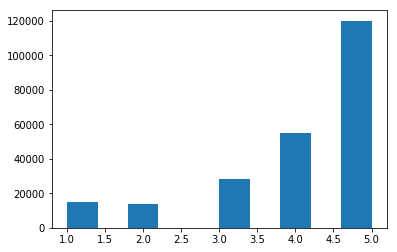

In [7]:
plt.hist(reviews['overall'])

In [8]:
# create a box plot 
reviews['rating'].value_counts()

1    174989
0     56791
Name: rating, dtype: int64

Text(0.5, 1.0, 'Class Distributions')

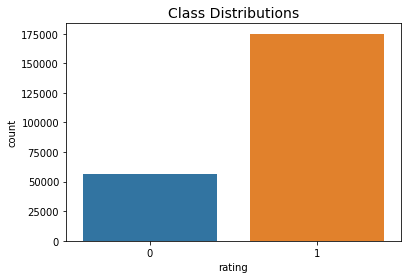

In [9]:
# create box plot, analysis of balanced classes 
sns.countplot('rating', data=reviews)
plt.title('Class Distributions', fontsize=14)


In [10]:
#Converting words into vectors 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(reviews.reviewText)
X_counts.shape

(231780, 210971)

In [11]:
#Converting words into numeric values 
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_tfidf.shape

(231780, 210971)

# Modeling 

### In this section I will test seven different classification models to see which model is the best for this task.

In [12]:
X = X_tfidf
Y = reviews['rating']

# Model 1: Random Forest Classifier 

In [ ]:
# Model 3: Random Forest gridsearchcv  
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()



param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [1,2,4,6,7,8],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X,Y)

# Show the best parameter and best score
print(grid.best_params_)
print( grid.best_score_)

With 20% Holdout: 0.7544007248252653
Testing on Sample: 0.7549788592630943
[0.7549506  0.75498317 0.75498317 0.75498317 0.75498317 0.75498317
 0.75498317 0.75498317 0.75498317 0.7549726 ]
Random Forest report :


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11385
           1       0.75      1.00      0.86     34971

   micro avg       0.75      0.75      0.75     46356
   macro avg       0.38      0.50      0.43     46356
weighted avg       0.57      0.75      0.65     46356

AUC: 0.648


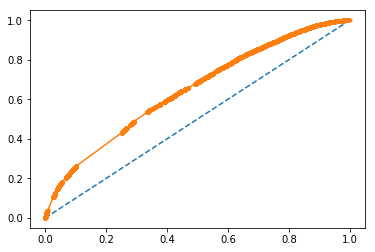

In [30]:
# Random forest model  
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=200, max_features=6 , max_depth=6)

X = X_tfidf
Y = reviews['rating']


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X, Y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, X, Y, cv=10))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)



import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()



#### Analysis

The AUC is above .5 which means the model is not totally random. However, there are many scores of zero in the classification report.While the precision score for predicting positive reviews is decent, there is an error above our plot that states "Precision and F-score are ill-defined and being set to 0.0 " this may also have an effect on the uneven  concentration of points along the curve and all of the other remaining metrics.  For this reason, this may not be the ideal model for this task. 


# Model 2: Native Bayes Classifier

With 20% Holdout: 0.6962061725199183
Testing on Sample: 0.7091250323582707
[0.68311834 0.65156614 0.65229959 0.69604798 0.6847873  0.68004142
 0.70808525 0.71826732 0.72983001 0.71135177]
Native Bayes Classification report :
              precision    recall  f1-score   support

           0       0.41      0.44      0.43     17121
           1       0.81      0.79      0.80     52413

   micro avg       0.71      0.71      0.71     69534
   macro avg       0.61      0.62      0.62     69534
weighted avg       0.72      0.71      0.71     69534

AUC: 0.709


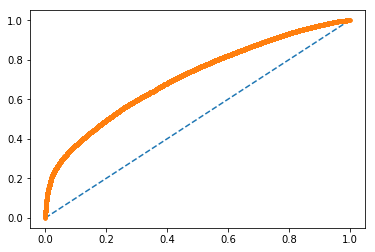

In [15]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X = X_tfidf
Y = reviews['rating']

# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(X, Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=200)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb, X, Y, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

#### Analysis 

While the score is lower on the holdout groups and test sample than the random forest model, the classification report reveals much better results.This model perfromed better than the random forest model with a higher AUC of .709 and higher recall and f1 score. The points along the curve are more evenly distributed as well. However, the ratio between precision of classifying positive and negitve reviews is very large, with the model perfoming twice as well in predicting positive cases. While this model is good we will see if we can do better.


# Model 3: Decision Tree Clasifier 

In [ ]:
# Using a smaller set for grid search to make it faster 
X = X_tfidf
Y = reviews['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)


In [ ]:
# Decision Tree Gridsearch 
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(X_train, y_train)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

With 20% Holdout: 0.7544438691862974
Testing on Sample: 0.7550953490378808
[0.7549506  0.75498317 0.75537147 0.7548106  0.75494003 0.75498317
 0.75498317 0.75498317 0.75494003 0.7544117 ]
Decision Tree report :
              precision    recall  f1-score   support

           0       0.62      0.00      0.00     11385
           1       0.75      1.00      0.86     34971

   micro avg       0.75      0.75      0.75     46356
   macro avg       0.69      0.50      0.43     46356
weighted avg       0.72      0.75      0.65     46356

AUC: 0.500


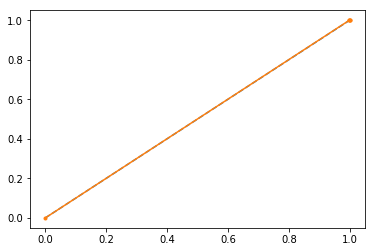

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=18,
    max_depth=6)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, X, Y, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

#### Analysis

This model preformed similiarly to the random forest model, but offered more insight into the precision in predicting non positive cases. In this regard, the model was more precise than the Native Bayes Model. The dashed line in the diagonal we present the ROC curve of a random predictor: it has an AUROC of 0.5. The random predictor is commonly used as a baseline to see whether the model is useful. In this instance the AUC lines along the diagonal line, suggesting that this model may not be the useful and even random. This may not be the ideal model for this task.

# Model 4: KNN Classifier 

In [ ]:
# Using a smaller set for grid search to make it faster, computer crashed  
X = X_tfidf
Y = reviews['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [ ]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X_train, y_train)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

In [ ]:
# Nearest neighbors model 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, Y, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

#### Analysis 

Running this would actually freeze my computer and I have had to restart my computer many times. The runtime for this model is not ideal.  This model is not ideal for this dataset and task.


# Model 5: SVM classifier 

In [ ]:
# Using a smaller set for grid search to make it faster, computer crashed  
X = X_tfidf
Y = reviews['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [ ]:
# SVM gridsearch best parameters 
from sklearn.svm import SVC

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=7, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(X_train, y_train)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)



In [ ]:
# SVM model 
from sklearn.svm import SVC
svm = SVC(C=1e-06, gamma=.001)

svm.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, X, Y, cv=10))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))


#### Analysis

I had let this model run overnight and had no returns. The runtime for this model is not ideal. This model may not be ideal for this dataset and task. 

# Model 6: Gradient Boosted Classifer

In [27]:
X = X_tfidf
Y = reviews['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [28]:
# Parameters to test in gridsearch cv 

from sklearn.model_selection import GridSearchCV 

params = {'n_estimators': [50, 100, 150, 200, 300, 500],
          'max_depth': [4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=4, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(X_train, y_train)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [29]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 100,
          'max_depth': 6,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

gb.fit(X,Y)


# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, X, Y, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


KeyboardInterrupt: 

#### Analysis

This model did not return any information after running overnight, this simply may not be the idea model for the task.

# Model 7: Logistic Regression classifier 

In [24]:
X = X_tfidf
Y = reviews['rating']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [25]:

# Logistic Regression Gridsearch cv 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (0.0001,0.001, 0.01, 0.1, 1)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=4, verbose=1)

#Fit the logistic regression 
logr_grid.fit(X_train, y_train)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.2min finished


{'C': 1, 'penalty': 'l1'}
0.8661014755371473


With 20% Holdout: 0.8661014755371473
Testing on Sample: 0.8774182414358443


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.85637862 0.86133402 0.86892743 0.86081629 0.87078264 0.86914315
 0.86853913 0.86487186 0.87224955 0.87025931]
Logistic regression report :
              precision    recall  f1-score   support

           0       0.81      0.65      0.72     11353
           1       0.89      0.95      0.92     35003

   micro avg       0.88      0.88      0.88     46356
   macro avg       0.85      0.80      0.82     46356
weighted avg       0.87      0.88      0.87     46356

AUC: 0.923


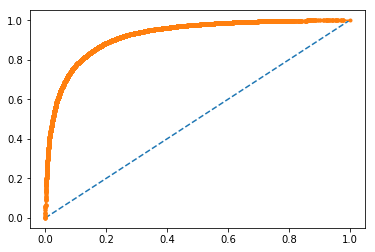

In [26]:
# Logistic regression model 
logr = LogisticRegression(C=1, penalty='l1')

logr.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, X, Y, cv=10))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

#### Analysis

While the runtime was over 20 minuites, this was the best preforming model with a score of 87.7%. The AUC is .92 which is excellent and  sugget that our model has an ample amount of sensitivity. There is little variation across each of the folds of the cross validation groups suggeting that the model is stable and our results are not random. This model gave the highest rate of precision for both classes, with both above 80%. Additionally, there is not a large difference between the precision rates like other models. This is the best model for our task.

# Conclusion

In this project I took the following steps to create a video game review classifier:

- exploration of the data
- prepared data for modeling
- ran 7 different classification models

In conclusion, the best model for this task is the logistic regression classifier. In performing analysis on this dataset, the main challenge I encourtered was the runtime of the models. The fastest models were the Naive Bayes and Decision tree after using gridsearch cv. The Logistic regression model and Random Forest took an ample amount of time but yielded results. SVM and Gradient boosted classifier would not yield results even after running overnight. The KNN took ample time and did not yield results but also froze my computer. For these reason I discounted SVM, Gradient Boosting, and KNN in evaluating the best model for the task. The logistic regression classifier out performed every model with the best performance on the test sample, highest AUC, and percision rate. 